In [1]:
import numpy as np
import math
from sklearn.model_selection import train_test_split
from data import *
from evaluation import *
%matplotlib inline

### 加载数据集

In [2]:
data_dir = 'datasets/ml-100k/u.data' 
N, M, data_list, _ = load_data(file_dir=data_dir)
print(' data length: %d \n user number: %d \n item number: %d' %(len(data_list),N,M))

 data length: 100000 
 user number: 943 
 item number: 1682


### 分割数据集

In [3]:
train_list, test_list = train_test_split(data_list,test_size=0.2)
print ('train length: %d \n test length: %d' %(len(train_list),len(test_list)))

train length: 80000 
 test length: 20000


### 将 list 转换成 矩阵

In [4]:
train_mat = sequence2mat(sequence = train_list, N = N, M = M)
test_mat = sequence2mat(sequence = test_list, N = N, M = M)

### 参数设置

In [5]:
learning_rate = 0.005
lamda_regularizer = 0.1
max_iteration = 100
K = 10

### 1. 非负矩阵分解 （NMF）

 step:0 
 loss:548530.0227,mae:3.5127,rmse:13.6117,recall:0.0210,precision:0.0446
 step:10 
 loss:35773.9410,mae:0.7704,rmse:0.9787,recall:0.0350,precision:0.0743
 step:20 
 loss:30101.7777,mae:0.7503,rmse:0.9236,recall:0.0396,precision:0.0841
 step:30 
 loss:26369.0138,mae:0.7517,rmse:0.9310,recall:0.0408,precision:0.0866
 step:40 
 loss:24197.1030,mae:0.7575,rmse:0.9496,recall:0.0398,precision:0.0845
 step:50 
 loss:22858.6473,mae:0.7630,rmse:0.9660,recall:0.0389,precision:0.0824
 step:60 
 loss:21960.7530,mae:0.7676,rmse:0.9803,recall:0.0355,precision:0.0752
 step:70 
 loss:21319.3049,mae:0.7716,rmse:0.9934,recall:0.0335,precision:0.0709
 step:80 
 loss:20839.0885,mae:0.7752,rmse:1.0056,recall:0.0315,precision:0.0668
 step:90 
 loss:20466.1888,mae:0.7785,rmse:1.0169,recall:0.0299,precision:0.0633
 end. 
 loss:20195.2326,mae:0.7814,rmse:1.0266,recall:0.0279,precision:0.0593
MAE:0.7814;RMSE:1.0266;Recall:0.0279;Precision:0.0593


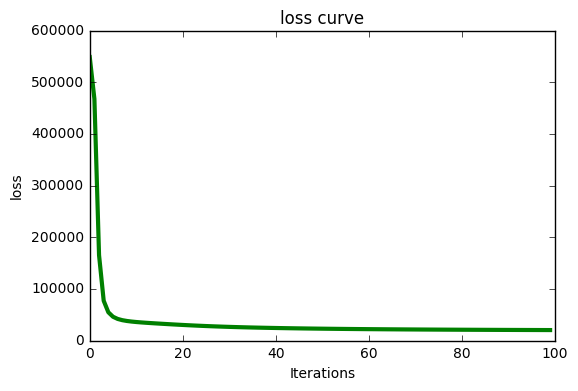

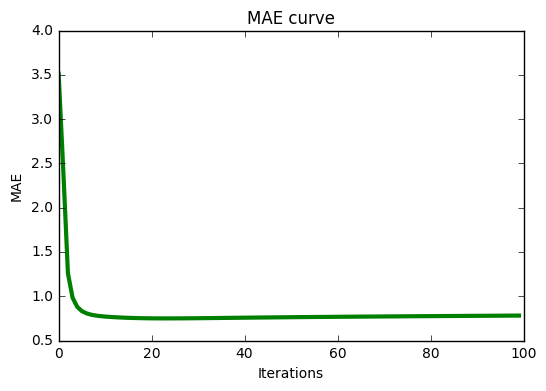

In [6]:
from nmf import *
model = nmf_sgd(train_list=train_list, 
                test_list=test_list, 
                N=N, 
                M=M,
                K=K,
                learning_rate=learning_rate,
                max_iteration=max_iteration)
P, Q, records_array = model.train()
print('MAE:%.4f;RMSE:%.4f;Recall:%.4f;Precision:%.4f'
      %(records_array[:,1][-1],records_array[:,2][-1],records_array[:,3][-1],records_array[:,4][-1]))

figure(values_list=records_array[:,0],name='loss')
figure(values_list=records_array[:,1],name='MAE')

 step:0 
 loss:8707493.4678,mae:3.9447,rmse:84.1428,recall:0.0246,precision:0.0522
 step:10 
 loss:3199449.5738,mae:3.3928,rmse:13.5287,recall:0.0186,precision:0.0393
 step:20 
 loss:8554693.1306,mae:3.8606,rmse:156.5868,recall:0.0221,precision:0.0470
 step:30 
 loss:2260663.8981,mae:3.5777,rmse:23.9332,recall:0.0288,precision:0.0611
 step:40 
 loss:1444433.1167,mae:3.5569,rmse:16.6414,recall:0.0246,precision:0.0522
 step:50 
 loss:1481557.5129,mae:3.6021,rmse:19.0156,recall:0.0260,precision:0.0551
 step:60 
 loss:1197875.3457,mae:3.5201,rmse:13.8019,recall:0.0268,precision:0.0568
 step:70 
 loss:664191712470.3215,mae:129.1503,rmse:8327084.0316,recall:0.0181,precision:0.0384
 step:80 
 loss:11659071.4916,mae:3.6568,rmse:38.6617,recall:0.0264,precision:0.0560
 step:90 
 loss:497986817.2438,mae:5.7873,rmse:4052.4777,recall:0.0251,precision:0.0532
 end. 
 loss:16765422.3427,mae:3.7906,rmse:128.3636,recall:0.0181,precision:0.0383
MAE:3.7906;RMSE:128.3636;Recall:0.0181;Precision:0.0383


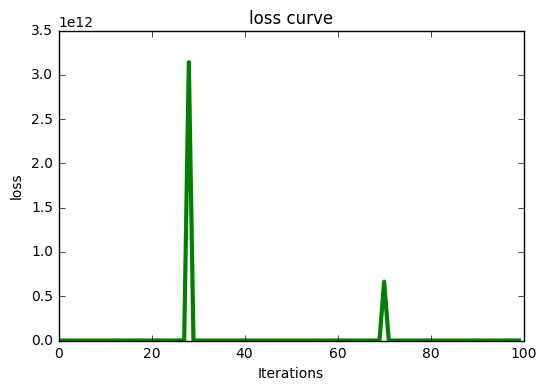

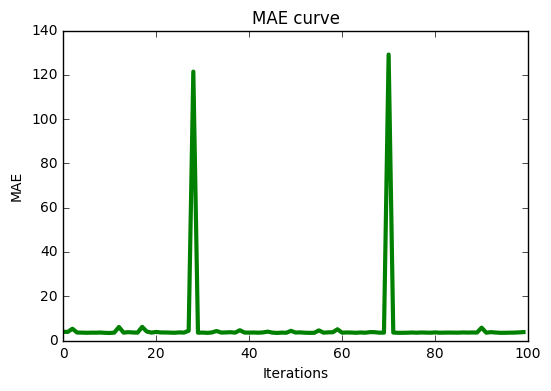

In [7]:
model = nmf_mult(train_list=train_list, 
                 test_list=test_list, 
                 N=N, 
                 M=M,
                 K=K,
                 max_iteration=max_iteration)
P, Q, records_array = model.train()
print('MAE:%.4f;RMSE:%.4f;Recall:%.4f;Precision:%.4f'
      %(records_array[:,1][-1],records_array[:,2][-1],records_array[:,3][-1],records_array[:,4][-1]))

figure(values_list=records_array[:,0],name='loss')
figure(values_list=records_array[:,1],name='MAE')

In [9]:
# sklearn 自带的 NMF 算法
from sklearn.decomposition import NMF
model = NMF(n_components=10, init='random', random_state=0)
train_mat = sequence2mat(sequence = train_list, N = N, M = M)
W = model.fit_transform(train_mat)
H = model.components_

def prediction(P, Q):
    N,K = P.shape
    M,K = Q.shape

    rating_list=[]
    for u in range(N):
        u_rating = np.sum(P[u,:]*Q, axis=1)
        rating_list.append(u_rating)
    r_pred = np.array(rating_list)
    return r_pred

# 预测评分
user = np.array(train_list)[:,0].astype(np.int16)
item = np.array(train_list)[:,1].astype(np.int16)
rating_true = np.array(train_list)[:,2]
rating_pred = np.sum(W[user,:]*H.T[item,:],axis=1)
loss = np.sum((rating_true-rating_pred)**2)
pred_mat = prediction(W, H.T)

# 评估算法
mae, rmse, recall, precision = evaluation(pred_mat, train_mat, test_mat)
print(loss, mae, rmse, recall, precision)

(514032.52780216181, 2.366875907452588, 6.9482022067689044, 0.15175, 0.32184517497348886)


### 2. 矩阵分解 （MF，SVD，Funk-SVD）

 step:0 
 loss:549274.8142,mae:3.5114,rmse:13.5999,recall:0.0180,precision:0.0382
 step:10 
 loss:65404.5762,mae:0.7808,rmse:0.9881,recall:0.0328,precision:0.0697
 step:20 
 loss:62533.4391,mae:0.7558,rmse:0.9159,recall:0.0324,precision:0.0687
 step:30 
 loss:61332.1955,mae:0.7446,rmse:0.8871,recall:0.0362,precision:0.0767
 step:40 
 loss:60545.2057,mae:0.7383,rmse:0.8724,recall:0.0366,precision:0.0776
 step:50 
 loss:59904.4783,mae:0.7340,rmse:0.8630,recall:0.0352,precision:0.0747
 step:60 
 loss:59376.8684,mae:0.7311,rmse:0.8572,recall:0.0340,precision:0.0721
 step:70 
 loss:58962.1662,mae:0.7294,rmse:0.8539,recall:0.0315,precision:0.0668
 step:80 
 loss:58647.0056,mae:0.7284,rmse:0.8525,recall:0.0302,precision:0.0642
 step:90 
 loss:58408.7568,mae:0.7279,rmse:0.8522,recall:0.0285,precision:0.0606
 end. 
 loss:58242.9217,mae:0.7278,rmse:0.8523,recall:0.0278,precision:0.0591
MAE:0.7278;RMSE:0.8523;Recall:0.0278;Precision:0.0591


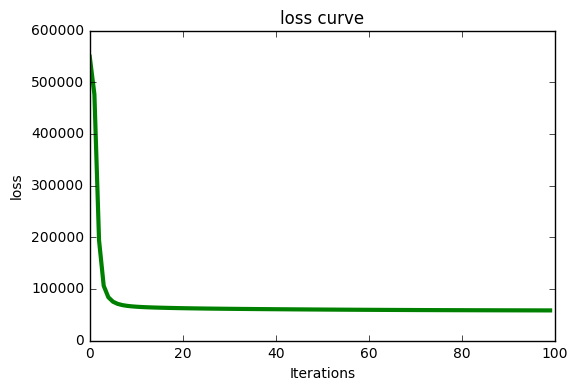

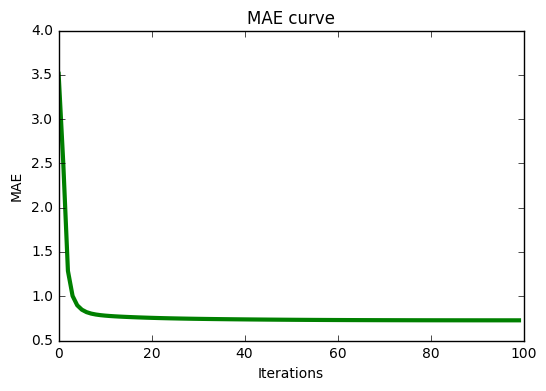

In [10]:
from mf import *
model = mf(train_list=train_list, 
           test_list=test_list, 
           N=N, 
           M=M,
           K=K,
           learning_rate=learning_rate, 
           lamda_regularizer=lamda_regularizer, 
           max_iteration=max_iteration)
P, Q, records_array = model.train()
print('MAE:%.4f;RMSE:%.4f;Recall:%.4f;Precision:%.4f'
      %(records_array[:,1][-1],records_array[:,2][-1],records_array[:,3][-1],records_array[:,4][-1]))

figure(values_list=records_array[:,0],name='loss')
figure(values_list=records_array[:,1],name='MAE')

### 3. 概率矩阵分解 （PMF）

 step:0 
 loss:549680.3605,mae:3.5177,rmse:13.6469,recall:0.0159,precision:0.0337
 step:10 
 loss:65535.5941,mae:0.7818,rmse:0.9908,recall:0.0328,precision:0.0695
 step:20 
 loss:62663.5601,mae:0.7575,rmse:0.9199,recall:0.0320,precision:0.0679
 step:30 
 loss:61381.9854,mae:0.7450,rmse:0.8886,recall:0.0357,precision:0.0756
 step:40 
 loss:60529.2566,mae:0.7377,rmse:0.8716,recall:0.0365,precision:0.0773
 step:50 
 loss:59862.3450,mae:0.7332,rmse:0.8611,recall:0.0359,precision:0.0761
 step:60 
 loss:59330.9171,mae:0.7303,rmse:0.8550,recall:0.0342,precision:0.0725
 step:70 
 loss:58917.3884,mae:0.7287,rmse:0.8520,recall:0.0316,precision:0.0670
 step:80 
 loss:58603.5406,mae:0.7280,rmse:0.8509,recall:0.0298,precision:0.0632
 step:90 
 loss:58368.0323,mae:0.7278,rmse:0.8511,recall:0.0280,precision:0.0594
 end. 
 loss:58206.2076,mae:0.7279,rmse:0.8517,recall:0.0271,precision:0.0575
MAE:0.7279;RMSE:0.8517;Recall:0.0271;Precision:0.0575


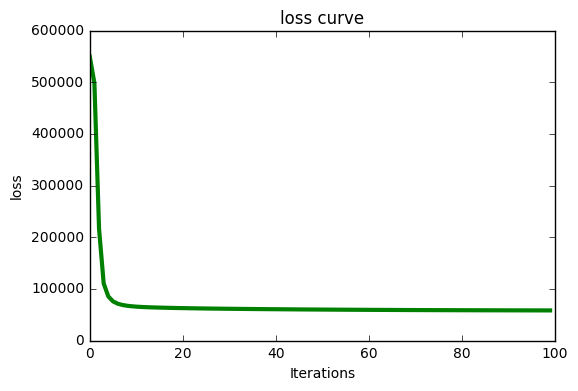

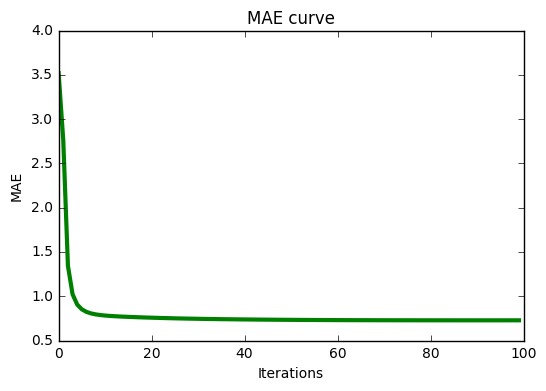

In [11]:
from pmf import *
model = pmf(train_list=train_list, 
            test_list=test_list, 
            N=N, 
            M=M,
            K=K,
            learning_rate=learning_rate, 
            lamda_regularizer=lamda_regularizer, 
            max_iteration=max_iteration)
P, Q, records_array = model.train()
print('MAE:%.4f;RMSE:%.4f;Recall:%.4f;Precision:%.4f'
      %(records_array[:,1][-1],records_array[:,2][-1],records_array[:,3][-1],records_array[:,4][-1]))

figure(values_list=records_array[:,0],name='loss')
figure(values_list=records_array[:,1],name='MAE')

### 4. 权重矩阵分解 （WMF）

 step:0 
 mae:2.1109,rmse:6.8433,recall:0.0176,precision:0.0374
 step:1 
 mae:0.8642,rmse:1.2853,recall:0.0694,precision:0.1472
 step:2 
 mae:0.8465,rmse:1.2464,recall:0.0757,precision:0.1607
 step:3 
 mae:0.8374,rmse:1.2206,recall:0.0779,precision:0.1652
 step:4 
 mae:0.8316,rmse:1.2020,recall:0.0775,precision:0.1645
 step:5 
 mae:0.8281,rmse:1.1907,recall:0.0779,precision:0.1651
 step:6 
 mae:0.8264,rmse:1.1850,recall:0.0779,precision:0.1652
 step:7 
 mae:0.8255,rmse:1.1826,recall:0.0789,precision:0.1673
 step:8 
 mae:0.8250,rmse:1.1822,recall:0.0779,precision:0.1651
 step:9 
 mae:0.8248,rmse:1.1828,recall:0.0780,precision:0.1655
 end. 
 mae:0.8248,rmse:1.1828,recall:0.0780,precision:0.1655
MAE:0.8248;RMSE:1.1828;Recall:0.0780;Precision:0.1655


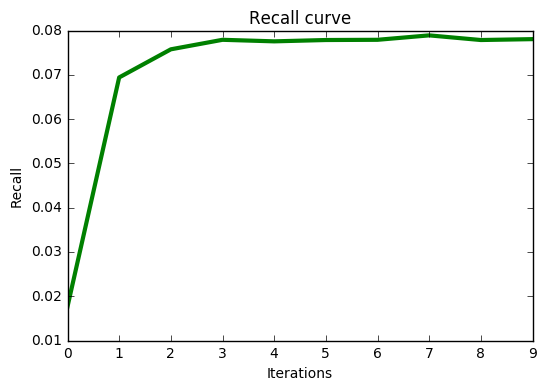

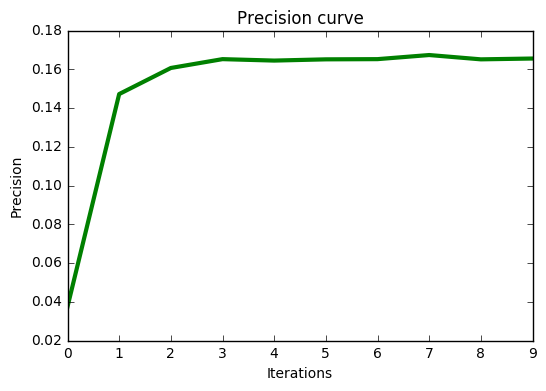

In [13]:
from wmf import *
max_iteration = 10
alpha=40
model = wmf(train_list=train_list, 
            test_list=test_list, 
            N=N, 
            M=M,
            K=K,
            alpha=alpha,
            lamda_regularizer=lamda_regularizer, 
            max_iteration=max_iteration)
P, Q, records_array = model.train()
print('MAE:%.4f;RMSE:%.4f;Recall:%.4f;Precision:%.4f'
      %(records_array[:,0][-1],records_array[:,1][-1],records_array[:,2][-1],records_array[:,3][-1]))

figure(values_list=records_array[:,2],name='Recall')
figure(values_list=records_array[:,3],name='Precision')

### 5. 带偏置的SVD（BiasSVD）

 step:0 
 loss:46763.4749,mae:0.8175,rmse:1.0195,recall:0.0647,precision:0.1372
 step:10 
 loss:47389.7184,mae:0.7510,rmse:0.8992,recall:0.0391,precision:0.0828
 step:20 
 loss:47709.3466,mae:0.7465,rmse:0.8903,recall:0.0316,precision:0.0669
 step:30 
 loss:47387.3729,mae:0.7417,rmse:0.8799,recall:0.0265,precision:0.0561
 step:40 
 loss:46674.2320,mae:0.7344,rmse:0.8639,recall:0.0307,precision:0.0650
 step:50 
 loss:45928.8626,mae:0.7288,rmse:0.8521,recall:0.0336,precision:0.0714
 step:60 
 loss:45228.4016,mae:0.7249,rmse:0.8445,recall:0.0339,precision:0.0719
 step:70 
 loss:44611.5566,mae:0.7225,rmse:0.8401,recall:0.0331,precision:0.0702
 step:80 
 loss:44106.0715,mae:0.7211,rmse:0.8381,recall:0.0312,precision:0.0662
 step:90 
 loss:43706.7132,mae:0.7205,rmse:0.8376,recall:0.0296,precision:0.0628
 end. 
 loss:43422.6423,mae:0.7203,rmse:0.8379,recall:0.0276,precision:0.0585
MAE:0.7203;RMSE:0.8379;Recall:0.0276;Precision:0.0585


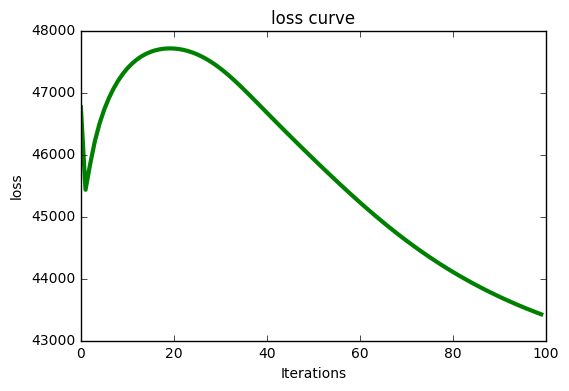

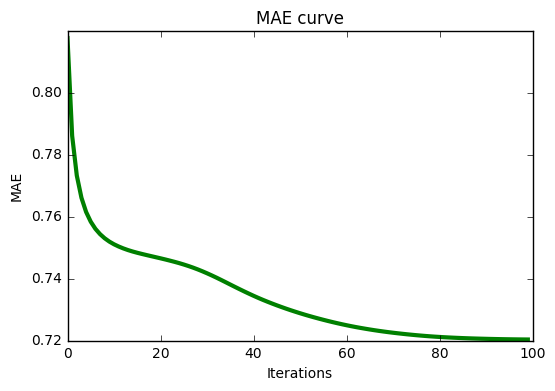

In [12]:
from biassvd import *
max_iteration = 100
model = biassvd(train_list=train_list, 
                test_list=test_list, 
                N=N, 
                M=M,
                K=K,
                learning_rate=learning_rate, 
                lamda_regularizer=lamda_regularizer, 
                max_iteration=max_iteration)
P, Q, bu, bi, records_array = model.train()
print('MAE:%.4f;RMSE:%.4f;Recall:%.4f;Precision:%.4f'
      %(records_array[:,1][-1],records_array[:,2][-1],records_array[:,3][-1],records_array[:,4][-1]))

figure(values_list=records_array[:,0],name='loss')
figure(values_list=records_array[:,1],name='MAE')

### 6. SVD++

 step:0 
 loss:114770.6618,mae:0.8175,rmse:1.0198,recall:0.0652,precision:0.1383
 step:10 
 loss:47597.8449,mae:0.7509,rmse:0.8988,recall:0.0391,precision:0.0828
 step:20 
 loss:47830.7927,mae:0.7454,rmse:0.8879,recall:0.0323,precision:0.0685
 step:30 
 loss:47572.2334,mae:0.7376,rmse:0.8714,recall:0.0295,precision:0.0626
 step:40 
 loss:46897.3534,mae:0.7289,rmse:0.8531,recall:0.0333,precision:0.0705
 step:50 
 loss:46207.0482,mae:0.7238,rmse:0.8422,recall:0.0341,precision:0.0723
 step:60 
 loss:45599.5553,mae:0.7205,rmse:0.8358,recall:0.0336,precision:0.0714
 step:70 
 loss:45082.6841,mae:0.7185,rmse:0.8321,recall:0.0322,precision:0.0683
 step:80 
 loss:44661.2057,mae:0.7172,rmse:0.8303,recall:0.0311,precision:0.0660
 step:90 
 loss:44327.7244,mae:0.7165,rmse:0.8296,recall:0.0288,precision:0.0610
 end. 
 loss:44090.3840,mae:0.7162,rmse:0.8297,recall:0.0276,precision:0.0585
MAE:0.7162;RMSE:0.8297;Recall:0.0276;Precision:0.0585


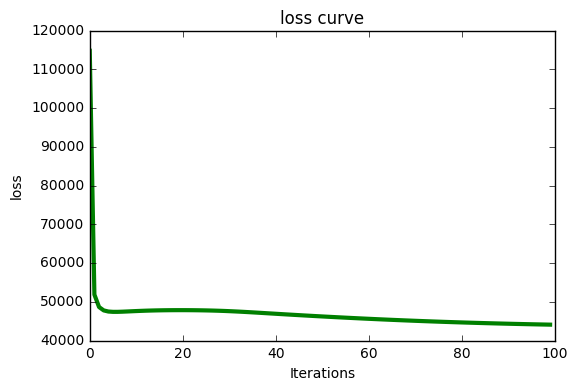

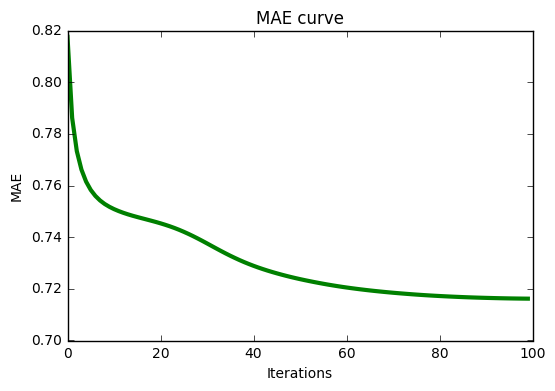

In [20]:
from svdplus import *
model = svdplus(train_list=train_list, 
                test_list=test_list, 
                N=N, 
                M=M,
                K=K,
                learning_rate=learning_rate, 
                lamda_regularizer=lamda_regularizer, 
                max_iteration=max_iteration)
P, Q, Y, bu, bi, records_array = model.train()
print('MAE:%.4f;RMSE:%.4f;Recall:%.4f;Precision:%.4f'
      %(records_array[:,1][-1],records_array[:,2][-1],records_array[:,3][-1],records_array[:,4][-1]))

figure(values_list=records_array[:,0],name='loss')
figure(values_list=records_array[:,1],name='MAE')

### 8. PureSVD

In [17]:
from puresvd import *
R_score = puresvd(R=train_mat, k=K)
mae, rmse, recall, precision = evaluation(pred_mat=R_score, train_mat=train_mat, test_mat=test_mat)
print('mae:%.4f,rmse:%.4f,recall:%.4f,precision:%.4f'%(mae,rmse,recall,precision))

mae:2.3452,rmse:6.8323,recall:0.1618,precision:0.3432
